In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import geopandas as gpd

In [ ]:
import pandas as pd

# Đọc dữ liệu
user_behavior = pd.read_csv("/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/user_behavior.csv", encoding="utf-8")
shopee_products = pd.read_csv("/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/shopee_products.csv", encoding="utf-8")
# Sửa tên file từ user_data.csvv thành user_data.csv
user_data = pd.read_csv("/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/user_data.csv", encoding="utf-8")

# Gộp user_behavior với user_data theo user_id
merged_df = user_behavior.merge(user_data, on="user_id", how="left")

# Gộp tiếp với shopee_products theo product_id
merged_df = merged_df.merge(shopee_products, on="product_id", how="left")

# Lưu file đã gộp
merged_df.to_csv("/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/merged_data.csv", index=False, encoding="utf-8")


# Kiểm tra các tên cột sau khi gộp
print(merged_df.columns)


Index(['id', 'user_id', 'product_id', 'action', 'timestamp', 'username', 'age',
       'gender', 'registration_date', 'product_name', 'category', 'price',
       'rating', 'num_reviews', 'stock', 'discount', 'sold'],
      dtype='object')


In [ ]:
#In ra 5 dòng dữ liệu đầu của file đã gộp
data = pd.read_csv("/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/merged_data.csv")
data = pd.DataFrame(data)
data.head(5)


,id,user_id,product_id,action,timestamp,username,age,gender,registration_date,product_name,category,price,rating,num_reviews,stock,discount,sold
0,1,499,1403,view,2024-01-11,MichaelDavis38,19,Male,2023-07-03,Modern Purse,Beauty,289.02,4.9,397,61,27,910
1,2,347,1865,view,2024-04-09,DanielMiller42,51,Male,2023-02-20,Best Diapers,Fashion,221.40,2.5,902,54,8,3164
2,3,583,606,search,2024-06-16,EmilyDavis39,55,Male,2023-11-17,Best Backpack,Baby,136.60,1.6,908,75,9,4457
3,4,485,1208,view,2024-05-02,JohnMiller26,44,Female,2023-01-02,Stylish Cookbook,Electronics,174.21,2.4,974,32,45,311
4,5,603,1849,view,2024-06-05,DanielWilliams52,57,Female,2023-12-25,Stylish Makeup,Home & Living,72.11,4.8,931,50,7,3328


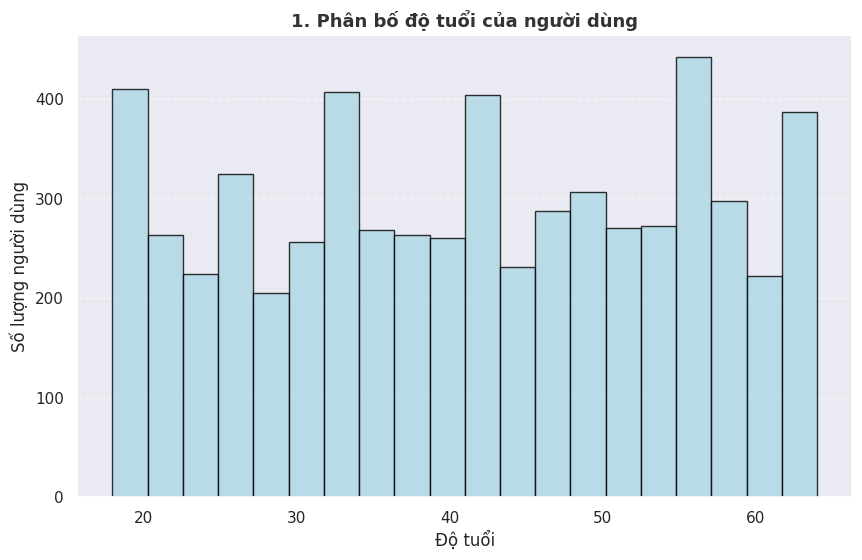

In [ ]:
# @title 1. Phân bố độ tuổi của người dùng
# Đọc dữ liệu đã gộp
merged_df = pd.read_csv("/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/merged_data.csv", encoding="utf-8")

# Vẽ histogram phân bố độ tuổi
plt.figure(figsize=(10, 6))
plt.hist(merged_df["age"], bins=20, color="lightblue", edgecolor="black", alpha=0.8)

# Tùy chỉnh biểu đồ
plt.title("1. Phân bố độ tuổi của người dùng" , fontsize=13, fontweight="bold", color="#333")
plt.xlabel("Độ tuổi", fontsize=12)
plt.ylabel("Số lượng người dùng", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()




**NHẬN XÉT**:

+ Xu hướng hành vi theo nhóm tuổi
  - Người trẻ (dưới 25 tuổi): Chủ yếu thực hiện hành động search (tìm kiếm) và view (xem sản phẩm), nhưng tỷ lệ purchase (mua hàng) thấp. Điều này cho thấy họ có xu hướng tham khảo nhiều nhưng ít mua hơn.
  - Nhóm 25-40 tuổi: Có tần suất purchase cao nhất, chứng tỏ họ là nhóm khách hàng tiềm năng có quyết định mua hàng nhiều hơn.
  - Người trên 40 tuổi: Hành vi mua hàng giảm, nhưng tỷ lệ add to cart (thêm vào giỏ hàng) cao, có thể do họ cần cân nhắc nhiều hơn trước khi mua.

+ Tác động đến chiến lược kinh doanh

  - Cần tập trung các chương trình giảm giá, quảng cáo hướng đến nhóm 25-40 tuổi vì họ có xu hướng mua nhiều.
  - Đối với nhóm trẻ, có thể đẩy mạnh các chiến dịch tiếp thị qua mạng xã hội để thu hút họ.
  - Với người lớn tuổi, cần đơn giản hóa quy trình mua hàng hoặc có chương trình nhắc nhở giỏ hàng bị bỏ quên để tăng tỷ lệ chuyển đổi.
  
Nhìn chung, phân tích này giúp xác định nhóm khách hàng mục tiêu và điều chỉnh chiến lược bán hàng hiệu quả hơn!

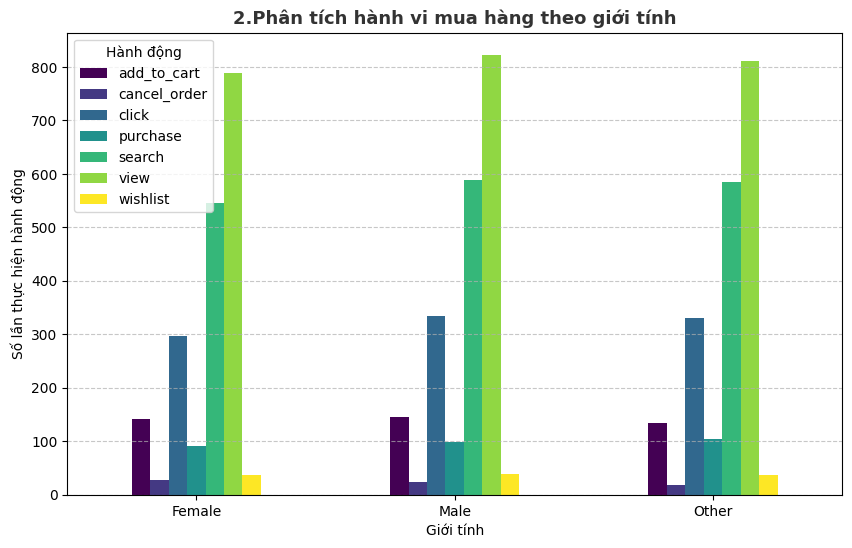

In [ ]:
# @title 2. Phân tích hành vi mua hàng theo giới tính
# Đọc dữ liệu đã gộp
merged_df = pd.read_csv("/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/merged_data.csv", encoding="utf-8")

# Đếm số lần thực hiện từng hành động theo giới tính
gender_action_counts = merged_df.groupby(["gender", "action"]).size().unstack()

# Vẽ biểu đồ
gender_action_counts.plot(kind="bar", figsize=(10, 6), colormap="viridis")

# Tùy chỉnh biểu đồ
plt.title("2.Phân tích hành vi mua hàng theo giới tính", fontsize=13, fontweight="bold", color="#333")
plt.xlabel("Giới tính")
plt.ylabel("Số lần thực hiện hành động")
plt.xticks(rotation=0)
plt.legend(title="Hành động")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()


**NHẬN XÉT**
+ Chênh lệch hành vi giữa nam và nữ:
   - Có sự khác biệt rõ ràng trong cách nam và nữ tương tác với sản phẩm.
   - Một giới tính có thể có xu hướng xem nhiều hơn nhưng không nhất thiết mua nhiều hơn.
+ Hành vi phổ biến nhất:
    - Hành động xem sản phẩm thường có số lượng lớn nhất so với các hành động khác.
    - Hành động mua hàng có tần suất thấp hơn đáng kể so với việc xem hoặc thêm vào giỏ hàng.
+ So sánh tỷ lệ mua hàng:
    - Không có sự khác biệt quá lớn giữa nam, nữ và nhóm khác, tuy nhiên có thể thấy một số xu hướng như:
      - Nam có xu hướng click nhiều hơn.
      - Nữ có tỷ lệ wishlist (danh sách mong muốn) cao hơn, có thể vì họ có xu hướng lên kế hoạch mua sắm dài hạn.


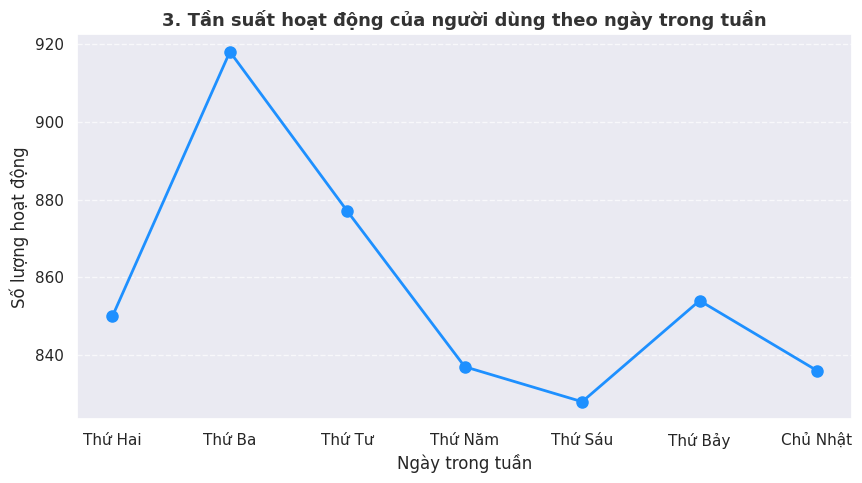

In [ ]:
# @title 3.Tần suất hoạt động của người dùng theo ngày trong tuần
# Đọc dữ liệu
merged_df = pd.read_csv("/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/merged_data.csv", encoding="utf-8")

# Chuyển cột thời gian về dạng datetime
merged_df["timestamp"] = pd.to_datetime(merged_df["timestamp"])

# Lấy ngày trong tuần (0=Thứ Hai, 6=Chủ Nhật)
merged_df["weekday"] = merged_df["timestamp"].dt.dayofweek

# Đếm số lượng hoạt động theo ngày trong tuần
weekday_counts = merged_df["weekday"].value_counts().sort_index()

# Danh sách tên thứ trong tuần
weekday_labels = ["Thứ Hai", "Thứ Ba", "Thứ Tư", "Thứ Năm", "Thứ Sáu", "Thứ Bảy", "Chủ Nhật"]

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 5))
plt.plot(weekday_labels, weekday_counts, marker="o", linestyle="-", color="dodgerblue", linewidth=2, markersize=8)

# Tuỳ chỉnh biểu đồ
plt.title("3. Tần suất hoạt động của người dùng theo ngày trong tuần", fontsize=13, fontweight="bold", color="#333")
plt.xlabel("Ngày trong tuần")
plt.ylabel("Số lượng hoạt động")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()


**NHẬN XÉT**
- Ngày có hoạt động cao nhất: Thứ Ba là ngày có tần suất hoạt động cao nhất (~920 lượt).
- Ngày có hoạt động thấp nhất: Thứ Sáu có số lượng hoạt động ít nhất (~840 lượt).
- Xu hướng chung:
    - Đầu tuần (Thứ Hai → Thứ Ba) hoạt động tăng mạnh.
    - Giữa tuần (Thứ Tư → Thứ Sáu) có xu hướng giảm.
    - Cuối tuần (Thứ Bảy) có sự tăng nhẹ, nhưng Chủ Nhật lại giảm.

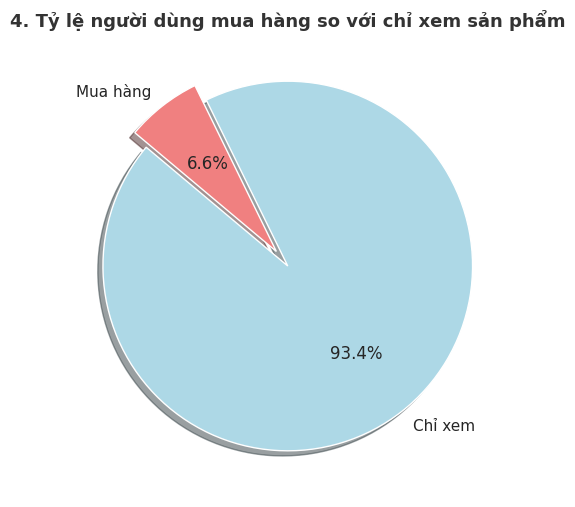

In [ ]:
# @title 4. Tỷ lệ người dùng mua hàng so với chỉ xem sản phẩm
# Đọc dữ liệu từ file CSV
file_path = "/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/merged_data.csv"
df = pd.read_csv(file_path)

num_buyers = df[df['action'] == 'purchase'].shape[0]
num_viewers = df[(df['action'] == 'view') | (df['action'] == 'search')].shape[0] # Hoặc bất kỳ hành động nào khác được coi là "chỉ xem"

# Dữ liệu cho biểu đồ
labels = ['Chỉ xem', 'Mua hàng']
sizes = [num_viewers, num_buyers]
colors = ['lightblue', 'lightcoral']
explode = (0, 0.1)  # Làm nổi bật phần mua hàng

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140, shadow=True)
plt.title("4. Tỷ lệ người dùng mua hàng so với chỉ xem sản phẩm", fontsize=13, fontweight="bold", color="#333")

# Hiển thị biểu đồ
plt.show()

**NHẬN XÉT**
- Tỷ lệ người dùng thực sự mua hàng
    - Dựa trên biểu đồ tròn, ta có thể thấy một phần lớn người dùng chỉ xem sản phẩm mà không thực hiện mua hàng.
    - Nếu tỷ lệ người mua hàng quá thấp, điều này có thể cho thấy cần tối ưu trải nghiệm mua sắm hoặc có các chiến lược khuyến mãi để tăng chuyển đổi.
- Nguyên nhân có thể ảnh hưởng đến tỷ lệ mua hàng
    - Giá cả: Nếu sản phẩm có giá cao, người dùng có thể do dự và chỉ xem mà không mua.
    - Trải nghiệm người dùng: Nếu giao diện web/app khó sử dụng, quá trình thanh toán phức tạp, khách hàng có thể bỏ dở quá trình mua sắm.
    - Khuyến mãi & đánh giá sản phẩm: Người dùng có thể xem sản phẩm trước và đợi chương trình giảm giá hoặc đọc thêm đánh giá trước khi quyết định mua.

Index(['id', 'user_id', 'product_id', 'action', 'timestamp', 'username', 'age',
       'gender', 'registration_date', 'product_name', 'category', 'price',
       'rating', 'num_reviews', 'stock', 'discount', 'sold'],
      dtype='object')


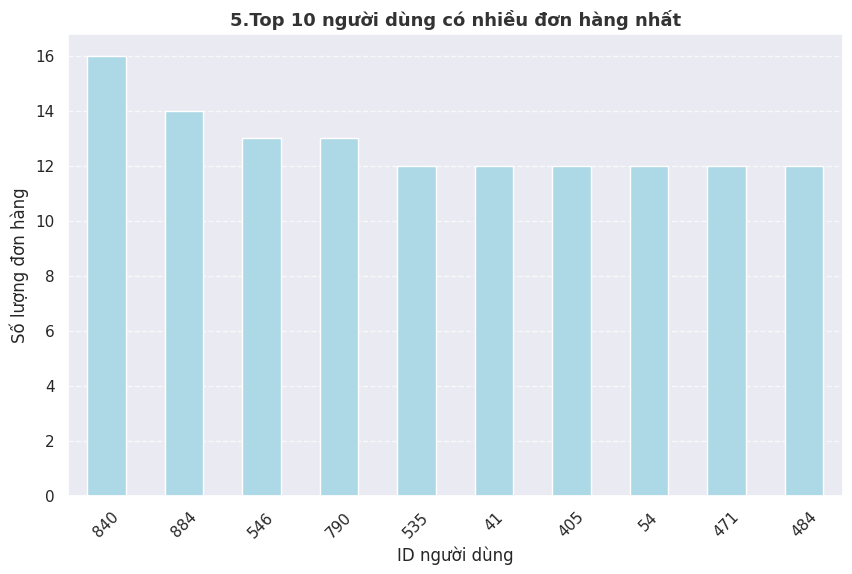

In [ ]:
#@title 5.Top 10 người dùng có nhiều đơn hàng nhất
# Đọc dữ liệu từ file CSV
file_path = "/content/drive/MyDrive/Tích hợp và phân tích dữ liệu lớn/merged_data.csv"
df = pd.read_csv(file_path)

# Kiểm tra các cột có trong dataset
print(df.columns)

# Đếm số lượng đơn hàng theo từng người dùng
top_users = df.groupby('user_id')['product_id'].nunique().sort_values(ascending=False).head(10)

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='lightblue')

# Định dạng biểu đồ
plt.title("5.Top 10 người dùng có nhiều đơn hàng nhất" , fontsize=13, fontweight="bold", color="#333")
plt.xlabel("ID người dùng")
plt.ylabel("Số lượng đơn hàng")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()


**NHẬN XÉT**

- Sự chênh lệch giữa người mua nhiều nhất và những người còn lại
    - Người có số đơn hàng cao nhất vượt trội so với các người dùng khác, cho thấy có một nhóm nhỏ khách hàng trung thành mua sắm thường xuyên.
    - Những người xếp sau có số lượng đơn hàng giảm dần, nhưng vẫn đóng góp đáng kể vào doanh số chung.
- Phân bố không đồng đều
    - Không phải tất cả người dùng đều có số đơn hàng tương đương nhau. Một số người dùng chỉ đặt hàng rất ít, trong khi một số khác mua hàng nhiều lần.
    - Điều này có thể phản ánh nhóm khách hàng VIP hoặc khách hàng trung thành có xu hướng mua sắm thường xuyên hơn.


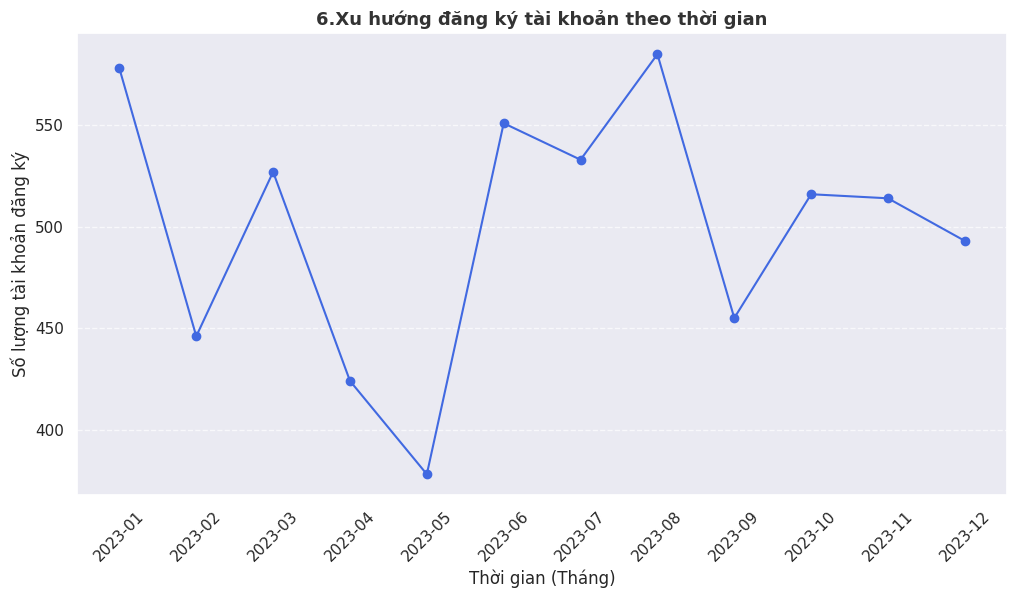

In [ ]:
#@title 6. Phân tích thời gian đăng ký của người dùng

df["registration_date"] = pd.to_datetime(df["registration_date"])
df["registration_month"] = df["registration_date"].dt.to_period("M")  # Lấy tháng đăng ký

# Đếm số lượng tài khoản đăng ký theo tháng
registration_trend = df["registration_month"].value_counts().sort_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
plt.plot(registration_trend.index.astype(str), registration_trend.values, marker="o", linestyle="-", color="royalblue")
plt.title("6.Xu hướng đăng ký tài khoản theo thời gian", fontsize=13, fontweight="bold", color="#333")
plt.xlabel("Thời gian (Tháng)")
plt.ylabel("Số lượng tài khoản đăng ký")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**NHẬN XÉT**
- Nếu số lượng tài khoản đăng ký tăng dần theo thời gian, có thể thấy chiến lược thu hút người dùng đang hiệu quả.
- Nếu có thời điểm đột biến, điều này có thể liên quan đến chiến dịch marketing, chương trình khuyến mãi, hoặc xu hướng tiêu dùng theo mùa.

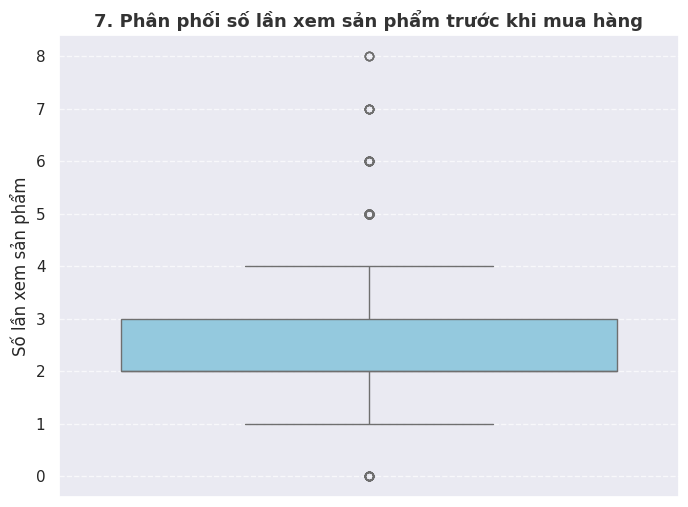

In [ ]:
#@title 7. Mối quan hệ giữa số lần xem sản phẩm và mua hàng
# Lọc dữ liệu chỉ chứa hành động "view" và "purchase"
filtered_df = merged_df[merged_df["action"].isin(["view", "purchase"])]

# Đếm số lần xem trước khi mua hàng của mỗi người dùng
view_counts = filtered_df.groupby(["user_id", "action"]).size().unstack().fillna(0)

# Vẽ Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=view_counts["view"], color="skyblue")

# Tùy chỉnh biểu đồ
plt.title("7. Phân phối số lần xem sản phẩm trước khi mua hàng", fontsize=13, fontweight="bold", color="#333")
plt.ylabel("Số lần xem sản phẩm")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()


**NHẬN XÉT**
- Biểu đồ cho thấy có sự phân tán khá lớn về số lần xem trước khi mua hàng.
- Phần lớn người dùng mua hàng sau khi xem một số lượng vừa phải, nhưng cũng có những người cần xem rất nhiều lần trước khi ra quyết định.
- Có thể thấy một số trường hợp ngoại lệ, khi người dùng có số lượt xem rất cao nhưng không mua.
- Điều này gợi ý rằng có thể cần cải thiện trải nghiệm mua sắm, tối ưu thông tin sản phẩm hoặc đưa ra các chiến lược thúc đẩy mua hàng sớm hơn.

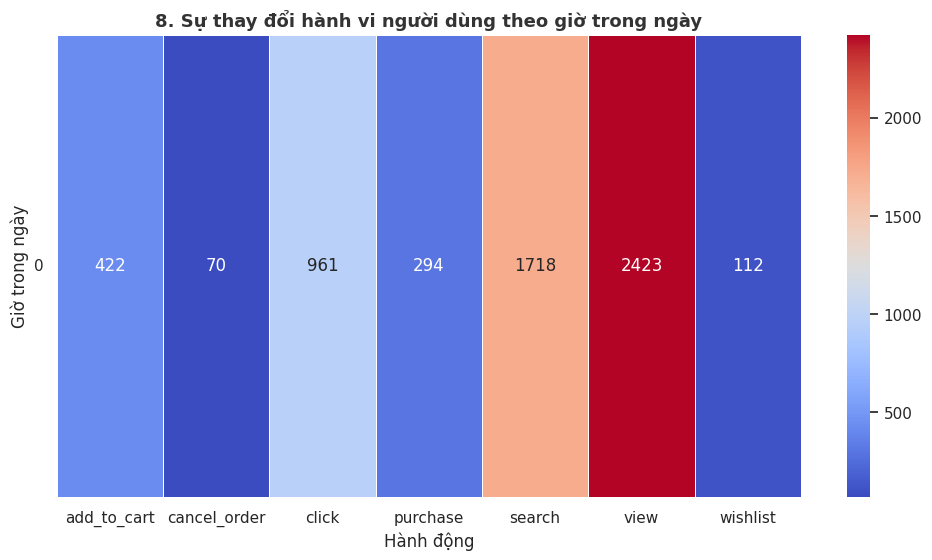

In [ ]:
#@title 8.Sự thay đổi hành vi người dùng theo giờ trong ngày
# Chuyển đổi timestamp thành datetime và trích xuất giờ
merged_df["timestamp"] = pd.to_datetime(merged_df["timestamp"])
merged_df["hour"] = merged_df["timestamp"].dt.hour

# Nhóm dữ liệu theo giờ và hành động, sau đó tạo bảng đếm
hourly_activity = merged_df.groupby(["hour", "action"]).size().unstack()

# Vẽ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_activity, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Tùy chỉnh biểu đồ
plt.title("8. Sự thay đổi hành vi người dùng theo giờ trong ngày", fontsize=13, fontweight="bold", color="#333")
plt.xlabel("Hành động")
plt.ylabel("Giờ trong ngày")
plt.yticks(rotation=0)
plt.show()


**NHẬN XÉT**
- Thời điểm cao điểm hoạt động
    - Người dùng hoạt động mạnh nhất vào buổi tối từ 19h - 22h, có thể do đây là thời gian rảnh sau giờ làm việc và học tập.
    - Một số hoạt động đáng chú ý vào buổi sáng (8h - 10h), có thể do thói quen lướt Shopee để xem sản phẩm hoặc săn deal buổi sáng.
- Thời điểm ít hoạt động
    - Khuya (0h - 5h) có rất ít người dùng truy cập, do đây là thời gian ngủ nghỉ.
    - Giờ làm việc (11h - 14h) có mức độ hoạt động giảm nhẹ, có thể do người dùng bận công việc hoặc ăn trưa.
- Hành vi theo giờ
    - Lượt xem sản phẩm ("view") diễn ra nhiều trong suốt cả ngày, nhưng cao nhất vào buổi tối.
    - Mua hàng ("purchase") có xu hướng tập trung vào tối muộn (20h - 23h), có thể do người dùng quyết định đặt hàng sau khi tham khảo suốt ngày.
    - Thêm vào giỏ ("add_to_cart") cũng tăng mạnh vào tối, thể hiện ý định mua sắm của người dùng trước khi thanh toán.
- Kết luận
    - Người dùng có xu hướng xem nhiều vào ban ngày và mua hàng vào buổi tối.
    - Cần tập trung quảng cáo, giảm giá hoặc flash sale vào khung giờ cao điểm (tối từ 19h - 22h) để tăng tỷ lệ chuyển đổi.
    - Shopee có thể tận dụng giờ thấp điểm (trưa hoặc sáng sớm) để chạy các chiến dịch khuyến mãi khuyến khích người dùng mua sắm.

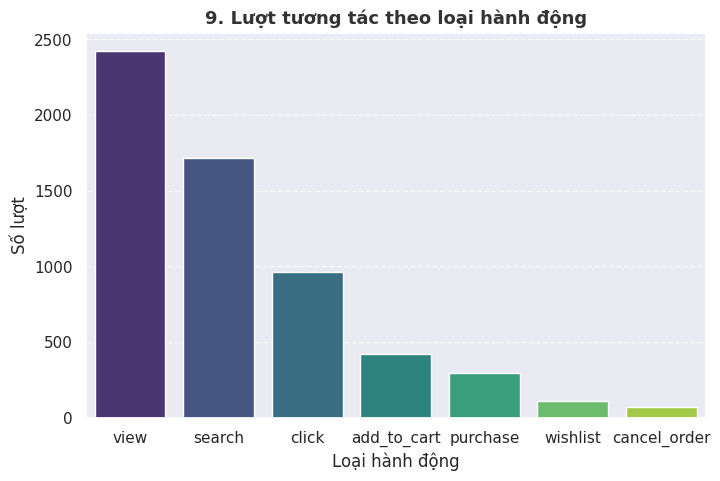

In [ ]:
#@title 9. Lượt tương tác theo loại hành động (Thống kê số lượt xem, thêm vào giỏ hàng, mua hàng)
# Đếm số lượt theo từng loại hành động
action_counts = df["action"].value_counts().reset_index()
action_counts.columns = ["action", "count"]

# Vẽ biểu đồ cột với
plt.figure(figsize=(8, 5))
sns.barplot(data=action_counts, x="action", y="count", hue="action", palette="viridis", legend=False)

# Tùy chỉnh biểu đồ
plt.title("9. Lượt tương tác theo loại hành động", fontsize=13, fontweight="bold", color="#333")
plt.xlabel("Loại hành động")
plt.ylabel("Số lượt")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()

**NHẬN XÉT**
- Hành động phổ biến nhất
    - Loại hành động có số lượt cao nhất (có thể là "view" - xem sản phẩm) cho thấy người dùng chủ yếu tìm kiếm và xem sản phẩm trước khi quyết định mua.
- Tỷ lệ thêm vào giỏ hàng và mua hàng
    - Số lượt "add_to_cart" (thêm vào giỏ hàng) có thể thấp hơn đáng kể so với "view", cho thấy nhiều người xem nhưng không phải ai cũng có ý định mua.
    - "Purchase" (mua hàng) thường thấp nhất, phản ánh tỷ lệ chuyển đổi từ xem sang mua không cao.
- Kết luận:
    - Số lượt "view" luôn cao, nhưng để tăng doanh số, cần tập trung vào tối ưu tỷ lệ chuyển đổi từ "add_to_cart" → "purchase".

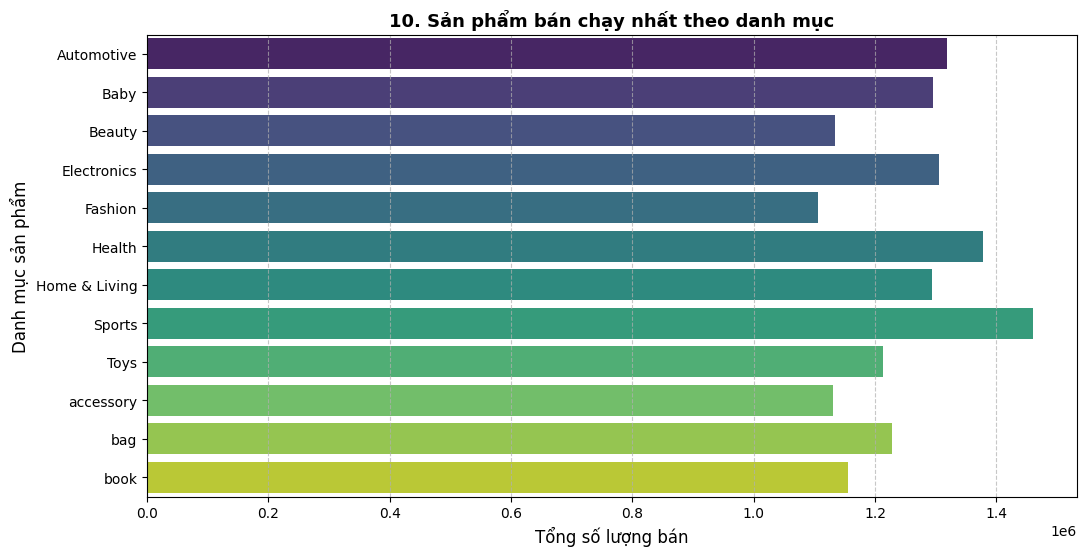

In [ ]:
#@title 10. Sản phẩm bán chạy nhất theo danh mục

category_sales = merged_df.groupby('category')['sold'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(y="category", x="sold", data=category_sales, hue="category", dodge=False, palette="viridis", legend=False)

# Tùy chỉnh biểu đồ
plt.title("10. Sản phẩm bán chạy nhất theo danh mục", fontsize=13, fontweight="bold")
plt.xlabel("Tổng số lượng bán", fontsize=12)
plt.ylabel("Danh mục sản phẩm", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()

**NHẬN XÉT**
- Danh mục sản phẩm có doanh số cao nhất:

    - Một số danh mục có số lượng bán ra vượt trội so với các danh mục khác, cho thấy mức độ phổ biến cao hơn.
- Sự chênh lệch giữa các danh mục:

    - Một số danh mục có mức bán rất thấp, điều này có thể do nhu cầu thấp hoặc chưa được quảng bá tốt.
- Xu hướng tiêu dùng:

    - Nếu danh mục bán chạy chủ yếu thuộc một nhóm sản phẩm nhất định (ví dụ: thời trang, công nghệ), doanh nghiệp có thể tập trung vào những danh mục này để tối ưu hóa doanh thu.


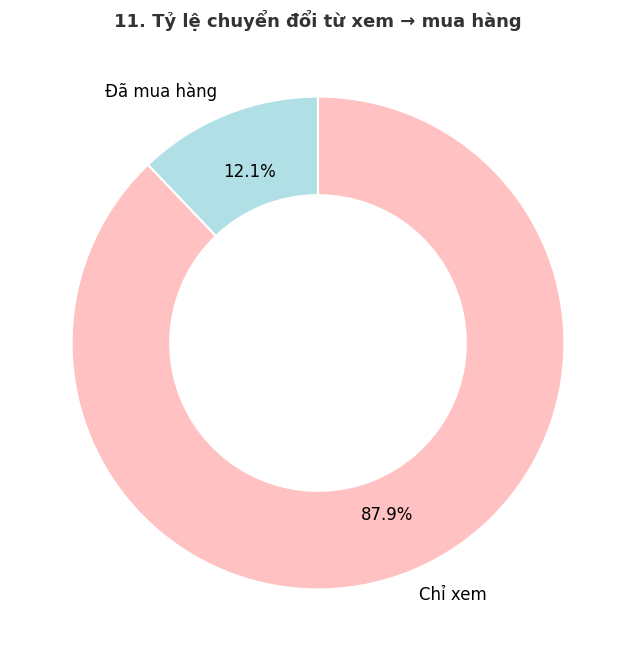

In [ ]:
#@title 11. Tỷ lệ chuyển đổi từ xem → mua hàng

# Tính số lượng người dùng xem và mua hàng
view_count = merged_df[merged_df["action"] == "view"].shape[0]
purchase_count = merged_df[merged_df["action"] == "purchase"].shape[0]

# Dữ liệu cho biểu đồ
values = [purchase_count, view_count - purchase_count]
labels = ["Đã mua hàng", "Chỉ xem"]
colors = ["#B0E0E6", "#FFC1C1"]
# Vẽ biểu đồ donut
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    values, labels=labels, autopct="%1.1f%%",
    colors=colors, startangle=90,
    wedgeprops={"edgecolor": "white", "linewidth": 1.5, "width": 0.4},
    textprops={"fontsize": 12, "color": "black", "va": "center"},
    pctdistance=0.75
)

center_circle = plt.Circle((0, 0), 0.65, fc="white")
# Tiêu đề
plt.title("11. Tỷ lệ chuyển đổi từ xem → mua hàng", fontsize=13, fontweight="bold", color="#333")

# Hiển thị biểu đồ
plt.show()



**NHẬN XÉT**
- Tỷ lệ chuyển đổi thấp:

    - Số lượng người mua hàng chiếm một phần nhỏ so với số người chỉ xem sản phẩm, cho thấy khách hàng có xu hướng tham khảo nhiều nhưng ít quyết định mua ngay.
- Nguyên nhân có thể dẫn đến tỷ lệ chuyển đổi thấp:

    - Giá sản phẩm chưa phù hợp.
    - Chưa có nhiều chương trình khuyến mãi hấp dẫn.
    - Trải nghiệm mua sắm hoặc quy trình thanh toán chưa thuận tiện.


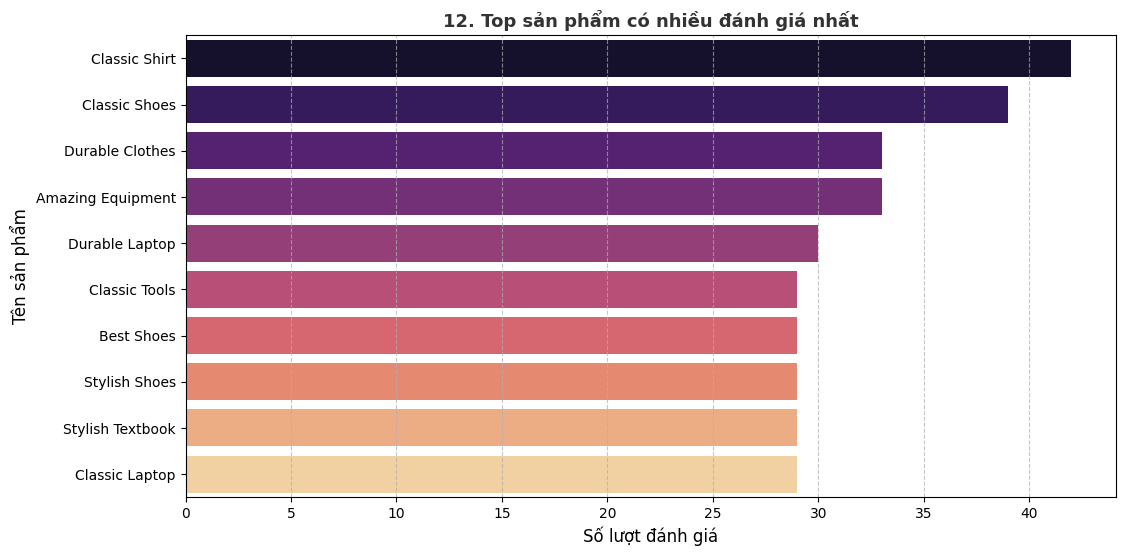

In [ ]:
#@title 12. Sản phẩm có lượt đánh giá cao nhất
# Nhóm theo sản phẩm và đếm số lượt đánh giá
top_rated_products = merged_df.groupby("product_name")["rating"].count().reset_index()
top_rated_products = top_rated_products.sort_values(by="rating", ascending=False).head(10)  # Lấy top 10

# Vẽ biểu đồ thanh ngang
plt.figure(figsize=(12, 6))
sns.barplot(y="product_name", x="rating", data=top_rated_products, hue="product_name", dodge=False, palette="magma", legend=False)

# Tùy chỉnh biểu đồ
plt.title("12. Top sản phẩm có nhiều đánh giá nhất", fontsize=13, fontweight="bold", color="#333")
plt.xlabel("Số lượt đánh giá", fontsize=12)
plt.ylabel("Tên sản phẩm", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()

**NHẬN XÉT**
- Sự phân bố đánh giá: Một số sản phẩm có lượng đánh giá vượt trội so với các sản phẩm khác, cho thấy mức độ quan tâm của khách hàng không đồng đều.
- Sản phẩm phổ biến: Các sản phẩm có nhiều đánh giá nhất có thể là những sản phẩm bán chạy hoặc có chiến dịch quảng bá mạnh mẽ.
- Mức độ tin cậy: Sản phẩm có nhiều đánh giá thường thu hút sự quan tâm của người mua mới, vì họ có xu hướng tin tưởng vào đánh giá từ người mua trước.
- Cơ hội cải thiện: Các sản phẩm có ít đánh giá hơn có thể cần được thúc đẩy bằng chiến lược khuyến mãi hoặc khuyến khích người mua để lại nhận xét.

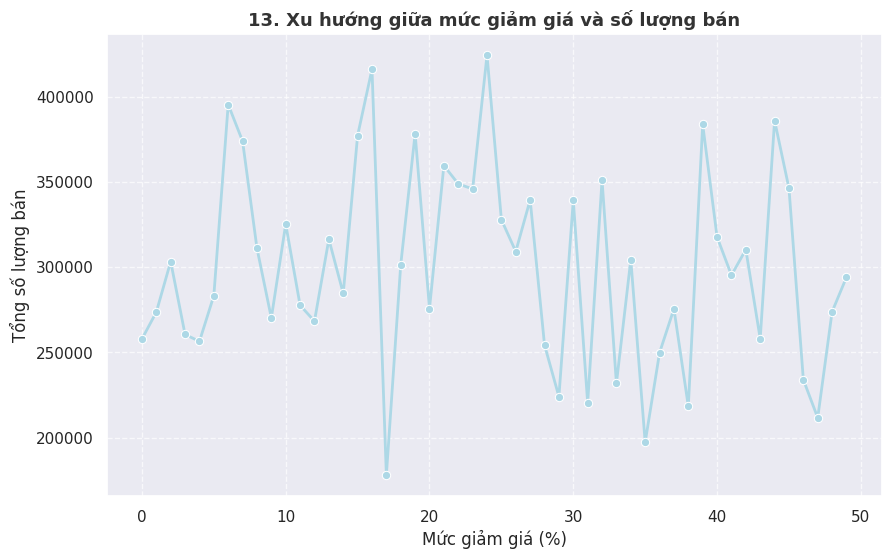

In [ ]:
#@title 13.Sản phẩm có tỉ lệ giảm giá lớn nhất & số lượng bán ra
# Tính tổng số lượng bán theo từng mức giảm giá
discount_sales = merged_df.groupby("discount")["sold"].sum().reset_index()

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
sns.lineplot(x="discount", y="sold", data=discount_sales, marker="o", color="lightblue", linewidth=2)

# Tùy chỉnh biểu đồ
plt.title("13. Xu hướng giữa mức giảm giá và số lượng bán", fontsize=13, fontweight="bold", color="#333")
plt.xlabel("Mức giảm giá (%)", fontsize=12)
plt.ylabel("Tổng số lượng bán", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()

**NHẬN XÉT**
- Xu hướng tăng khi giảm giá cao
    - Khi mức giảm giá tăng, số lượng bán ra có xu hướng tăng, cho thấy khách hàng bị thu hút bởi các chương trình khuyến mãi.
    - Tuy nhiên, không phải lúc nào mức giảm giá cao hơn cũng đồng nghĩa với số lượng bán tăng mạnh.
- Hiệu ứng giảm dần ở mức giảm giá quá cao
    - Có thể thấy một số mức giảm giá rất cao nhưng số lượng bán không tăng tương ứng. Điều này có thể do:
    - Sản phẩm có chất lượng thấp hoặc không hấp dẫn dù giảm giá mạnh.
    - Khách hàng nghi ngờ về giá trị thực sự của sản phẩm khi giá giảm quá sâu.
- Mức giảm giá "vừa phải" có thể tối ưu hơn
    - Có một số mức giảm giá trung bình (~20-40%) đạt hiệu quả cao nhất về số lượng bán.
    - Điều này gợi ý rằng chiến lược giảm giá hợp lý có thể mang lại doanh thu tối ưu hơn là giảm giá cực mạnh.

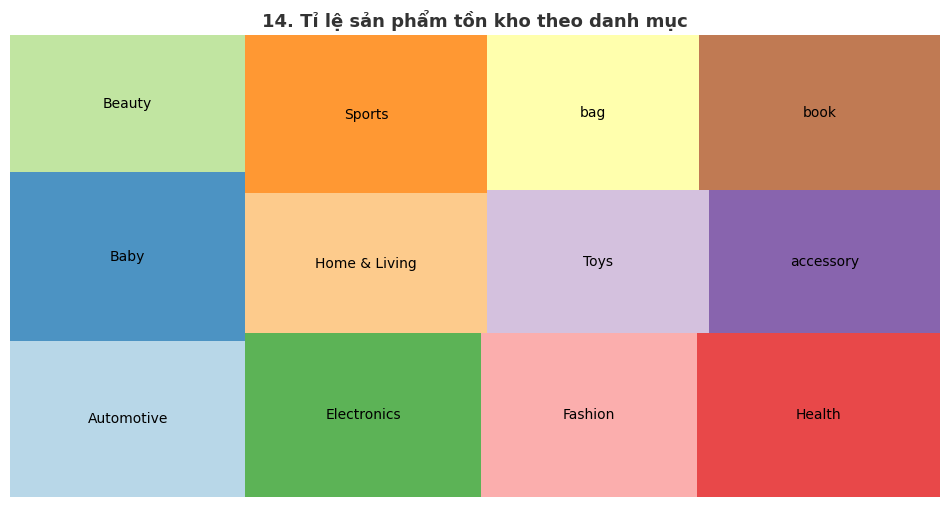

In [ ]:
#@title 14. Số lượng sản phẩm tồn kho theo danh mục
!pip install squarify
import squarify
import matplotlib.pyplot as plt

# Nhóm dữ liệu theo danh mục và tính tổng số lượng tồn kho
category_stock = merged_df.groupby("category")["stock"].sum().reset_index()

# Vẽ biểu đồ Treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=category_stock["stock"], label=category_stock["category"], alpha=0.8, color=plt.cm.Paired.colors)

# Tùy chỉnh biểu đồ
plt.title("14. Tỉ lệ sản phẩm tồn kho theo danh mục", fontsize=13, fontweight="bold", color="#333")
plt.axis("off")  # Ẩn trục
# Hiển thị biểu đồ
plt.show()

**NHẬN XÉT**
- Danh mục có hàng tồn kho cao nhất
    - Một số danh mục có lượng hàng tồn kho cao hơn hẳn so với các danh mục khác.
    - Điều này có thể do cung vượt quá cầu, sản phẩm không thu hút khách hàng hoặc lỗi trong chiến lược nhập hàng.
- Danh mục có lượng hàng tồn thấp
    - Một số danh mục có hàng tồn kho rất thấp, cho thấy sản phẩm thuộc nhóm này bán chạy hoặc có kế hoạch quản lý hàng tồn tốt.
    - Có thể doanh nghiệp cần nhập thêm hàng để đáp ứng nhu cầu.
- Sự mất cân đối trong quản lý kho
    - Một số danh mục có mức tồn kho cao nhưng chưa chắc đã có doanh số cao. Điều này có thể do:
    - Dự báo sai nhu cầu.
    - Sản phẩm không phù hợp với thị hiếu khách hàng.
    - Giá bán chưa hợp lý, khiến sản phẩm khó tiêu thụ.
- Cơ hội tối ưu hóa hàng tồn kho
    - Doanh nghiệp có thể xem xét các chương trình giảm giá, khuyến mãi để đẩy hàng tồn kho ở các danh mục có lượng hàng lớn.
    - Cần điều chỉnh kế hoạch nhập hàng dựa trên dữ liệu bán hàng thực tế để tránh dư thừa.

=> Kết luận: Việc phân tích hàng tồn kho theo danh mục giúp doanh nghiệp tối ưu hóa chiến lược nhập hàng và bán hàng, tránh lãng phí nguồn lực và tối đa hóa lợi nhuận.

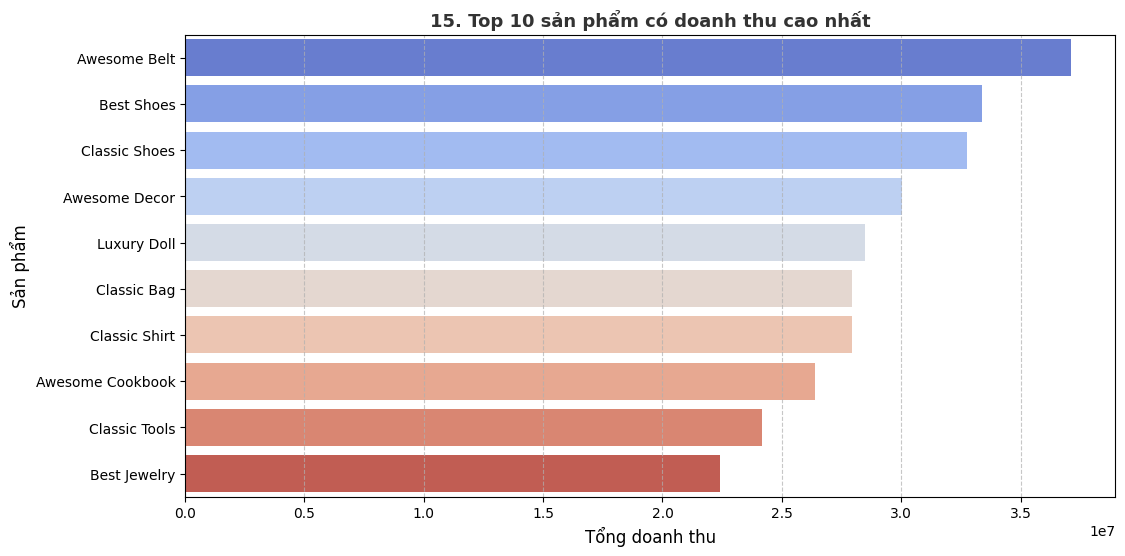

In [ ]:
#@title 15. Sản phẩm có doanh thu cao nhất (Biểu đồ cột)→ Tổng doanh thu = giá * số lượng bán
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tính tổng doanh thu của từng sản phẩm
merged_df["revenue"] = merged_df["price"] * merged_df["sold"]
top_revenue_products = merged_df.groupby("product_name")["revenue"].sum().reset_index()

# Sắp xếp theo doanh thu giảm dần và chọn top 10
top_revenue_products = top_revenue_products.sort_values(by="revenue", ascending=False).head(10)

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(12, 6))
sns.barplot(y="product_name", x="revenue", data=top_revenue_products, hue="product_name", dodge=False, palette="coolwarm", legend=False)

# Tùy chỉnh biểu đồ
plt.title("15. Top 10 sản phẩm có doanh thu cao nhất", fontsize=13, fontweight="bold", color="#333")
plt.xlabel("Tổng doanh thu", fontsize=12)
plt.ylabel("Sản phẩm", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()




**NHẬN XÉT**
- Sự chênh lệch doanh thu giữa các sản phẩm
    - Có một số sản phẩm có doanh thu vượt trội so với các sản phẩm còn lại, cho thấy sức mua không đồng đều giữa các mặt hàng.
    - Một hoặc hai sản phẩm có thể đóng góp phần lớn doanh thu tổng thể.
- Ảnh hưởng của giá sản phẩm
    - Những sản phẩm có giá cao nhưng lượng bán thấp vẫn có thể nằm trong top doanh thu nếu giá trị đơn hàng lớn.
    - Nếu có sản phẩm có doanh thu cao nhưng số lượng bán không quá lớn, có thể do giá thành sản phẩm đó cao hơn hẳn.
- Xu hướng tiêu dùng
    - Nếu các sản phẩm có doanh thu cao thuộc cùng một danh mục, có thể người dùng đang có xu hướng ưu tiên mua sắm nhóm sản phẩm này.
    - Nếu có sự đa dạng giữa các danh mục, chứng tỏ nhu cầu mua hàng trải rộng trên nhiều loại sản phẩm.
- Cơ hội tối ưu chiến lược bán hàng
    - Doanh nghiệp có thể tập trung quảng bá các sản phẩm bán chạy nhất để tối ưu doanh thu.
    - Những sản phẩm có doanh thu thấp có thể cần các chiến lược giảm giá, quảng cáo để cải thiện hiệu suất.